<a href="https://colab.research.google.com/github/Raoufmamedov/HH.ru-parsing/blob/main/Base_%22Parsing_HH1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЦЕЛЬ РАБОТЫ: Парсинг сайта HH.ru для изучения распределения вакансий по специальность Data Scientist открытых в г. Москве по уровню позиции и ожидаемому опыту кандидата.


In [2]:
!pip install requests
!pip install beautifulSoup4
from pprint import pprint # Импортируем функцию pprint()
import json, requests, pytz
import pandas as pd
import numpy as np
from bs4  import BeautifulSoup
from datetime import datetime
!pip install lxml
# pytz.all_timezones
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# url='https://hh.ru/search/vacancy?L_save_area=true&text=Data+scientist&excluded_text=&salary=&currency_code=RUR&experience=doesNotMatter&order_by=relevance&search_period=0&items_on_page=50000'

Проведём парсинг страниц по запросу Data Scientist с извлечением текстовой информации из раздела 'main', создавая словарь описаний по страницам и далее объединяя его содержимое в единый список.

In [ ]:
BSMPDict=dict()
page = 0
while page <15:
      url = f"https://hh.ru/vacancies/data-scientist?page={page}"
      # url = f"https://hh.ru/vacancies/data-engineer?page={page}"
      # url = f"https://hh.ru/search/vacancy?text=Machine+learning"
      # url = f"https://hh.ru/search/vacancy?text=Data+scientist"
      BSMPDict[str(page)]=BeautifulSoup(requests.get(url,
                                                     headers={'User-Agent':
                                                              'Mozilla/5.0'}).
                                        text, parser='html.parser')
      page = page + 1
listofvacs=[]
for dic in BSMPDict:
  for doc in [*BSMPDict[dic].find_all('main')]:
    listofvacs.append(doc.get_text(separator=' ', strip=True))
# ct = datetime.now(pytz.timezone('Europe/Moscow')).strftime("%d.%m.%y %H:%M")

Очищаем текст от невидимых пробельных символов, преобразуем список в единую строку

In [ ]:
listofvacs_clear=[i.replace("\xa0", " ") for i in listofvacs]
listofvacs_clear=[i.replace("\u202f", " ") for i in listofvacs_clear]
# listofvacs_clear=[i.replace('фильтры 1 2 3 4 5 ... 7 дальше|2 3 4 5 6 7 дальше|3 4 5 6 7 дальше', " ") for i in listofvacs_clear]
listofvacs=listofvacs_clear
listofvacs=" ".join(listofvacs)

In [ ]:
# Модуль сохранения спарсенного текста
def vac_desc_dumper(list_to_dump, timestamp=False):
  if timestamp:
    ct = datetime.now(pytz.timezone('Europe/Moscow')).strftime("%d.%m.%y %H:%M")
    print(listofvacs, file=open('hh_ru_mul('+ct+').txt','w'))
  else:
    print(listofvacs, file=open('hh_ru_mul.txt','w'))

Посмотрим что у нас получилось

In [1]:
# from pprint import pprint
pprint(listofvacs[10])

NameError: name 'pprint' is not defined

Для фиксации состояния нашнего описания вакансий, сохраним список в текстовый файл

In [ ]:
vac_desc_dumper(listofvacs, timestamp=False)

In [ ]:

# response = requests.get(url,  headers={'User-Agent': 'Mozilla/5.0'}) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
# # page = BeautifulSoup(response.text) # Создаём объект BeautifulSoup, указывая html-парсер
# page = BeautifulSoup(response.text, from_encoding='utf-8') # Создаём объект BeautifulSoup, указывая html-парсер
# # print(page.title) # Получаем тег title, отображающийся на вкладке браузера
# # print(page.title.text) # Выводим текст из полученного тега, который содержится в атрибуте text

# # print(page.body) # Получаем тег title, отображающийся на вкладке браузера
# # print(page.body.text) # Выводим текст из полученного тега, который содержится в атрибуте text

In [ ]:
parsed='hh_ru_mul.txt'

In [ ]:
pd.set_option('max_colwidth', 250)
pd.set_option('display.width', 500)

Преобразуем текст в серию Pandas и очистим её

In [ ]:
vacs=pd.read_csv(parsed, sep="Откликнуться", engine='python', header=None).squeeze().T
vacs=vacs.str.lower()
vacs=vacs.str.replace("фильтры|в начало|показать|контакты|1 2 3 4 5 ... 7|\
дальше|2 3 4 5 6 7|3 4 5 6 7", " ")
vacs.str.strip()
vacs=vacs.str.replace("по вашему запросу ещё будут появляться новые вакансии. \
присылать вам?", "")
vacs=vacs.str.replace("ключевые слова в названии вакансии, в названии компании", "")
vacs=vacs.str.replace("   |  ", "")
vacs=vacs.str.replace("и в описании вакансии|попробуйте другие варианты \
поискового запроса", " ")
vacs=vacs.str.replace("работодатель сейчас онлайн|откликнитесь среди первых|\
можно без резюме", " ")
vacs=vacs.str.replace("да, на почту в мессенджер|узнать о жизни в компании", " ")
vacs=vacs.str.replace("исследователь математик", " ")
vacs=vacs.str.replace("data mining data science data analyst data big data \
machine learning master data hadoop", " ")
vacs=vacs.str.replace("подработка|за сутки|за последние три дня|и еще 1|и еще 3|\
и еще 2", " ")
vacs=vacs.str.replace("попробуйте другие варианты поискового запроса", " ")
# vacs=vacs.str.replace("попробуйте другие варианты поискового запроса", " ")
# vacs=vacs.str.replace("можно из домa|откликнитесь среди первых|можно без резюмe|на почту|в мессенджер", " ")
vacs=vacs.str.replace("быстрые без опыта работы полная занятость частичная|\
занятость проектная работа полный день|сменный график\
|вахтовый метод удаленная работа гибкий график|от прямых работодателей|для людей\
с инвалидностью|быстрые без опыта", " ")
# # исследователь математик подработка за сутки за последние три дня без|а работы полная занятость частичная занятость проектная работа полный день сменный график вахтовый метод удаленная работа гибкий график от прямых работодателей для людей с инвалидностью", "")


# Убираем последнюю запись которая всегда содержит списоперечисление возможных условий и графика занятости и преобразуем серию в датафрейм
vacs=vacs[:-1].to_frame()
vacs['sal KRUR']=vacs.get(0).apply(lambda x: [int(s) for s in x.split() if \
 (s.isdigit() and 1905>int(s)>10)])
vacs['experience']=vacs.get(0).apply(lambda x: [int(s) for s in x.split() if \
 (s.isdigit() and 7>int(s)>0 and int(s) in [1, 3, 6])])
vacs['sal']=vacs['sal KRUR'].apply(lambda x:" ".join(map(str, x)))
# vacs['experience']=vacs['experience'].apply(lambda x:" ".join(map(str, x)))
vacs

,0,sal KRUR,experience,sal
0,"data scientist в направление ""работодатели"" ооо headhunter::analytics/data science москва , алексеевская опыт от 3 до 6 лет",[],"[3, 6]",
1,data scientist carcade leasing москва опыт от 1 года до 3 лет,[],"[1, 3]",
2,? data scientist москва data scientist skillbox (ооо система кэспа) москва опыт от 1 года до 3 лет можно из дома,[],"[1, 3]",
3,data scientist от 300 000 ₽ open hiring москва опыт от 1 года до 3 лет,[300],"[1, 3]",300
4,"аналитик данных / data scientist, удаленно вкусвилл. офис москва опыт от 1 года до 3 лет можно из дома",[],"[1, 3]",
...,...,...,...,...
318,lead data scientist (анализ цены и trade in) домклик москва опыт от 3 до 6 лет,[],"[3, 6]",
319,product analyst ооо ок софт москва опыт от 3 до 6 лет можно из дома,[],"[3, 6]",
320,lead ai data scientist до 8 000 $ compound solutions sl москва опыт от 3 до 6 лет,[],"[3, 6]",
321,senior data scientist / ведущий business intelligence специалист ао рамакс интернейшнл москва опыт от 3 до 6 лет,[],"[3, 6]",


Мы очистили наш датасет от балластной информации и выделили 2 признака: стаж и оклад. Посмотрим, достаточно ли у нас данных для проведения исследования.

In [ ]:
vacs[0][vacs[0].str.contains('senior')]

30                                                     python-разработчик (middle/senior) от 250 000 ₽ rubbles москва опыт от 3 до 6 лет 
75                                                       data scientist (middle/senior) до 450 000 ₽ rubbles москва опыт от 3 до 6 лет   
89      специалист senior computer vision data scientist (детекция фотошопа в документах) до 350 000 ₽ нейровижн москва опыт более 6 лет 
125                    middle / senior data scientist (nlp) пао втб, технологический блок москва , выставочная   опыт от 1 года до 3 лет 
126                                   middle data scientist/senior иннотех, группа компаний москва опыт от 1 года до 3 лет можно из дома 
                                                                      ...                                                                
310                                                                 senior data scientist адв москва , павелецкая   опыт от 3 до 6 лет   
311                     senior dat

In [ ]:

# vacs.get(0).str.split('(\опыт)', expand=True).isna().sum()

In [ ]:
vacs['sal KRUR']=vacs['sal KRUR'].apply(lambda x: x if len(x)>0 else np.nan) # Очистка серии от пустых спиской

In [ ]:
vacs['sal KRUR'].notna().sum()

24

In [ ]:
# Определение процента записей содержащих данные о зарплатных предложениях
sal_av=vacs['sal KRUR'].notna().sum()
vac_with_sal_pct=round(100*vacs['sal KRUR'].value_counts(dropna=False, normalize=True)[1:].sum(), 1)
Markdown(f' Итак, у нас имеются данные по предлагаемому окладу только для {sal_av} вакансий что составляет {vac_with_sal_pct} % от количества записей в датасете.')

 Итак, у нас имеются данные по предлагаемому окладу только для 24 вакансий что составляет 7.4 % от количества записей в датасете.

In [ ]:
# vacs[vacs['sal KRUR'].notna()]

По зарплатам мы имеем 3 вида записей:

1) С чётко определённым диапазоном зарплат

2) С указанием максимального оклада

3) С указанием минимального оклада

Учитывая это, нам необходимо выделить не тоько цифры но и слова "до" и "от", ограничивающие полузамкнутые интервалы.

In [ ]:
import re
pat='([a-я]*\s\d{1,3}\s\d{3}\s)'
a=vacs.get(0).str.findall(pat)
vacs['sal']=vacs.get(0).str.findall(pat).apply(lambda x: x if len(x)>0 else np.nan)
vacs.head()

,0,experience,Sal_min,Sal_max,sal
0,"data scientist в направление ""работодатели"" ооо headhunter::analytics/data science москва , алексеевская опыт от 3 до 6 лет","[3, 6]",NaN,NaN,NaN
1,data scientist carcade leasing москва опыт от 1 года до 3 лет,"[1, 3]",NaN,NaN,NaN
2,? data scientist москва data scientist skillbox (ооо система кэспа) москва опыт от 1 года до 3 лет можно из дома,"[1, 3]",NaN,NaN,NaN
3,data scientist от 300 000 ₽ open hiring москва опыт от 1 года до 3 лет,"[1, 3]",300000.0,NaN,[от 300 000 ]
4,"аналитик данных / data scientist, удаленно вкусвилл. офис москва опыт от 1 года до 3 лет можно из дома","[1, 3]",NaN,NaN,NaN


Преобразуем данные по зарплатам в признаки минимального и максимального оклада

In [ ]:
def splitter(row):
  minval=np.nan
  maxval=np.nan
  if isinstance(row, float):
    # minval=np.nan
    # maxval=np.nan
    return minval, maxval
  else:
      if pd.Series(row).str.contains('от').any():
        minval=row[0][-8:]
        return minval, maxval
      elif pd.Series(row).str.contains('до').any():
        maxval=row[0][-8:]
        return minval, maxval
      else:
        try:
          minval=row[0]
          maxval=row[1]
        except:
          row=row.str.strip(row)
          print(row)
          # row=[float(elem.replace(' ', '')) for elem in row]
          minval=row[0]
          maxval=row[1]
          return minval, maxval
        finally:
          return minval, maxval
a =vacs['sal'].apply(splitter)

Поскольку у нас имеются зарплаты указанные в долларах, нам необходимо осуществить преобразование их значений в рублёвый эквивалент по текущему курсу.
Для этого запрашиваем значение курса и сохраняем его в переменную usd.

In [ ]:
import xml.etree.ElementTree as et
v_date = datetime.now().strftime("%d.%m.%Y")
# Адрес api метода для запроса get
url = 'https://www.cbr.ru/scripts/XML_daily.asp'
params = {
    'date_req': v_date
}
# Отправляем get request (запрос GET)
response = requests.get(url, params)
tree = et.ElementTree(et.fromstring(response.text))
root = tree.getroot()
df_cols = ["name", "value"]
rows = []
for node in root:
    s_name = node.find("Name").text if node is not None else None
    s_value = node.find("Value").text if node is not None else None
    rows.append({"name": s_name, "value": s_value})

currate = pd.DataFrame(rows, columns = df_cols)
usd=float(currate[currate.name.str.contains('США')]['value'].str.replace(",", "."))
usd

93.0351

In [ ]:
#извлекаем признак минимального оклада и очищаем его от слов и преобразуем в формат с плавающей точкой
vacs['Sal_min']=a.apply(lambda x: x[0]).str.strip().str.replace(" ", "").str.extract(pat='(\d{1,3}\d{3})')
vacs['Sal_min']=pd.to_numeric(vacs['Sal_min'], errors='coerce')

#Tе же операции (кроме очистки от слов) проводим и на признаке максимальной зарплаты
vacs['Sal_max']=a.apply(lambda x: x[1]).str.strip().str.replace(" ", "")
vacs['Sal_max']=pd.to_numeric(vacs['Sal_max'], errors='coerce')

In [ ]:
vacs['Sal_max']=vacs['Sal_max'].apply(lambda x: x*usd if x<15000 else x)
vacs['Sal_min']=vacs['Sal_min'].apply(lambda x: x*usd if x<15000 else x)

Мы извлекли информацию по имеющимся в записях зарплатам. Получим статистику по максимальным и минимальным значениям предлагаемых окладов (в тыс. рублей).

In [ ]:
salstat=(vacs[['Sal_min', 'Sal_max']].describe().iloc[1:,:]/1000).round(1).T

In [ ]:
salstat

,mean,std,min,25%,50%,75%,max
Sal_min,218.6,97.6,80.0,135.0,200.0,300.0,400.0
Sal_max,337.5,99.9,150.0,300.0,350.0,400.0,550.0


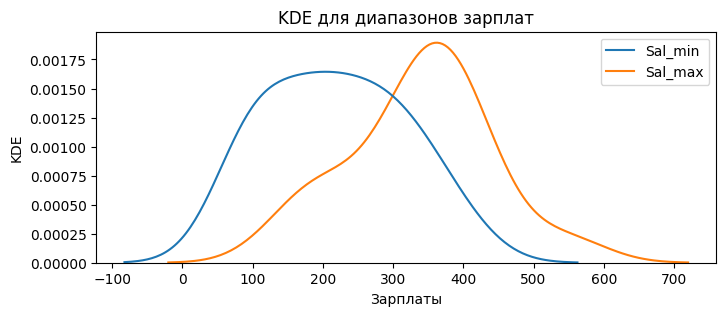

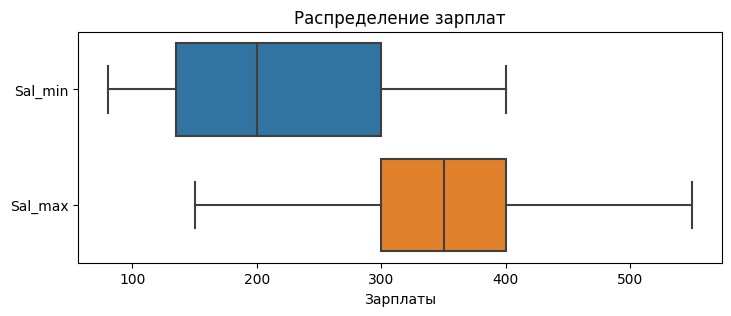

In [ ]:

# axis.set_tick_params(labelsize=7)
plt.figure(figsize=[8, 3])
plt.tick_params(axis='both', which='minor', labelsize=12)
trursal=vacs[['Sal_min', 'Sal_max']]/1000
x_label='Зарплаты'
sns.kdeplot(trursal).set(title="KDE для диапазонов зарплат", xlabel=x_label, ylabel='KDE')
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.show()
plt.figure(figsize=[8.3, 3])
sns.boxplot(trursal,  orient='h').set(xlabel=x_label, title='Распределение зарплат')
plt.show()

In [ ]:
display(Markdown(f'Итак, минимальное значение указанной минимальной зарплаты составляет {vacs.Sal_min.min()/1000} т. р., \
а её максимальное значение составляет {vacs.Sal_min.max()/1000} т. р.'))
display(Markdown(f'Минимальное наблюдаемое значение верхнего предела диапазона зарплат равно {vacs.Sal_max.min()/1000} т. р., а максимальное наблюдаемое значение составляет \
{vacs.Sal_max.max()/1000} т. р., но скорее всего является выбросным (ищется уникальный высококвалифицированные специалист). \
Медианные значения зарплат лежат в пределах {salstat["50%"].min()} - {salstat["50%"].max()} т. р. В целом характер распределения зарплат близок к нормальному.'))

Итак, минимальное значение указанной минимальной зарплаты составляет 80.0 т. р., а её максимальное значение составляет 400.0 т. р.

Минимальное наблюдаемое значение верхнего предела диапазона зарплат равно 150.0 т. р., а максимальное наблюдаемое значение составляет 550.0 т. р., но скорее всего является выбросным (ищется уникальный высококвалифицированные специалист). Медианные значения зарплат лежат в пределах 200.0 - 350.0 т. р. В целом характер распределения зарплат близок к нормальному.

Мы, однако должны понимать что зарплаты указали в основном компании заинтересованные в привлечении опытных специалистов, знающих цену своей квалификации и предпочитающих сразу получить информацию о предлагаемой компенсации, в то время как оклад начинающих специалистов указывается значительно реже. Поэтому реальные меры центральной тенденции скорее всего значительно ниже.

Удалим серии которые нам больше не потребуются и проведём дальнейшее выделение интересующей нас информации

In [ ]:
vacs.drop(["sal", "sal KRUR"], axis=1, inplace=True)

Преобразуем уже имеющийся в нашем распоряжении категориальный признак experience (стаж кандидата)

In [ ]:
exp_mapping={"без опыта":"<1 г",
             "опыт от 1 года до 3 лет": "1-3 г",
             "опыт от 3 до 6 лет":"3-6 л",
             "более 6 лет": ">6 л"}

def contains_mapper(x):
    group = ""
    for key in exp_mapping:
        if key in x:
            group = exp_mapping[key]
            break
        else:
           group=np.nan
    return group

vacs['experience']=vacs.get(0).apply(contains_mapper)


3-6 л    166
1-3 г    123
<1 г      20
>6 л      14
Name: experience, dtype: int64

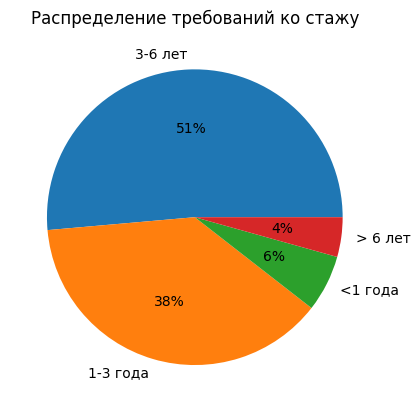

In [ ]:
exp_dist=vacs['experience'].value_counts(dropna=False)
exp_dist_norm=round(exp_dist.transform(lambda x: x/sum(x))*100, 1)
display(exp_dist)
plt.title('Распределение требований ко стажу')
plt.pie(exp_dist, autopct='%.0f%%', labels=['3-6 лет', '1-3 года', '<1 года', '> 6 лет'])
plt.show()

Больше половины работодателей ожидают стаж 3-6 лет, чуть более трети согласны рассматривать кандидатов со стажем 1-6 лет.

In [ ]:
Markdown(f'Количество вакансий с требуемым стажем менее 1 года и более 6 лет на рынке невелико, группа составляют \
 {exp_dist_norm[">6 л"]} % и {exp_dist_norm["<1 г"]} % соответственно')

Количество вакансий с требуемым стажем менее 1 года и более 6 лет на рынке невелико, группа составляют  4.3 % и 6.2 % соответственно

Попробуем доизвлечь из корпуса описаний (а именно из первого столбца) дополнительные признаки. Перед тем как это сделать, мы удалим из очищаемого столбца уже выделенную нами информацию по требованиям ко стажу.

In [ ]:
vacs.iloc[:, 0]=vacs.get(0).str.replace('опыт от 1 года до 3 лет|опыт от 3 до 6 лет|без опыта|опыт более 6 лет', "")

Мы парсили данные для г. Москвы, соответственно данное слово для нас неинформативно и мы можем использовать его в качестве разделителя. Также у нас имеется словосочетание "можно из дома", которое возможно несёт какую-то информацию (его мы удалять не будем, но для разбиения применим).

In [ ]:
a=vacs.get(0).str.split('москва|(можно из дома)', expand=True)
# .get(2).value_counts()

Проверим содержимое столбцов после разбиения

In [ ]:
a.isna().sum()

0      0
1    323
2      0
3    265
4    257
5    319
6    319
dtype: int64

Итак у нас 2 признака без пропусков в первом и третьев столбце (колонки с индексамии 0 и 2), А также 3 столбца с пропусками (1, 5 и 6 колонки).
Посмотрим что содержат колонки с индексами  3 и 4.

In [ ]:
a=a.iloc[:, np.r_[0, 2:5]]
a

,0,2,3,4
0,"data scientist в направление ""работодатели"" ооо headhunter::analytics/data science",", алексеевская",None,None
1,data scientist carcade leasing,,None,None
2,? data scientist,data scientist skillbox (ооо система кэспа),None,
3,data scientist от 300 000 ₽ open hiring,,None,None
4,"аналитик данных / data scientist, удаленно вкусвилл. офис",,можно из дома,
...,...,...,...,...
318,lead data scientist (анализ цены и trade in) домклик,,None,None
319,product analyst ооо ок софт,,можно из дома,
320,lead ai data scientist до 8 000 $ compound solutions sl,,None,None
321,senior data scientist / ведущий business intelligence специалист ао рамакс интернейшнл,,None,None


Проверяем полученные серии

In [ ]:
[print(a.loc[:, i].value_counts(dropna=False), '\n') for i in [3, 4]]

None             265
можно из дома     58
Name: 3, dtype: int64 

None                257
                     48
                     10
                      6
                      1
 , кутузовская        1
Name: 4, dtype: int64 



[None, None]

Итак в третьей серии довольно много записей содержащих условие "можно из дома", мы можем использовать его как ещё один признак нашего исследования, а серия 4 практически пустая и мы удаляем её.

In [ ]:
# a.loc[:, 3].fillna(np.nan, inplace=True)
a.loc[:, 3]=np.where(a.get(3)=="можно из дома", True, False)
a=a.iloc[:, :-1]

<ipython-input-221-727197cb0714>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  a.loc[:, 3]=np.where(a.get(3)=="можно из дома", True, False)


Доочищаем данные от пробелов и символов, а также текста не несущего полезной информации

In [ ]:
a[2]=a[2].str.strip("'  '|'    '|,")
a[0]=a[0].str.strip(',|)|(| ooo | пао | ао |.|+|-|&|[|?').str.replace('/|::', ' ').str.replace('(', ' ').str.replace(')', ' ')
a.loc[:, 2]=a.loc[:, 2].str.strip().str.replace("быстрые|работы полная занятость частичная|опыт|для людей с инвалидностью", " ").str.strip()

In [ ]:
a.head(30)

,0,2,3
0,"data scientist в направление ""работодатели"" ооо headhunter analytics data science",алексеевская,False
1,data scientist carcade leasing,,False
2,data scientist,data scientist skillbox (ооо система кэспа),False
3,data scientist от 300 000 ₽ open hiring,,False
4,"налитик данных data scientist, удаленно вкусвилл. офис",,True
5,junior data scientist в softline digital softline,,False
6,data scientist decision making and portfolio quality control instruments от 80 000 ₽ bro22,,False
7,data scientist llm ооо эвотор,,True
8,data scientist ренессанс банк,,False
9,стажер data scientist сбер для экспертов,,False


У нас имееется несколько позиций которые были неправильно распределены по столбцам. Проводим исправления, перенося из столбца 2 все тексты состоящие более чем из 3 слов (название станции метро редко состоит из более чем трёх слов).

In [ ]:
a['b']=a.get(2).str.split(' ').apply(len)>3 #индикаторый столбец
a[0]=np.where(a.get('b'), a.get(0)+' '+a.get(2), a.get(0))


In [ ]:
a[0]

0                           data scientist в направление "работодатели" ооо headhunter analytics data science
1                                                                              data scientist carcade leasing
2      data scientist data scientist skillbox (ооо система кэспа) data scientist skillbox (ооо система кэспа)
3                                                                     data scientist от 300 000 ₽ open hiring
4                                                    налитик данных   data scientist, удаленно вкусвилл. офис
                                                        ...                                                  
318                                                      lead data scientist  анализ цены и trade in  домклик
319                                                                               product analyst ооо ок софт
320                                                   lead ai data scientist до 8 000 $ compound solutions sl
321       

In [ ]:
a[2]=np.where(a.get('b'), np.nan, a.get(2))


In [ ]:
locs=round(a.loc[:, 2].value_counts(normalize=True)*100, 0)
locs

                   70.0
кутузовская         5.0
деловой центр       3.0
павелецкая          2.0
выставочная         2.0
войковская          2.0
технопарк           2.0
белорусская         1.0
алексеевская        1.0
профсоюзная         1.0
университет         1.0
комсомольская       1.0
кузнецкий мост      1.0
маяковская          1.0
площадь ильича      1.0
зорге               1.0
баррикадная         1.0
бауманская          1.0
сокол               1.0
кунцевская          0.0
калужская           0.0
парк культуры       0.0
улица 1905 года     0.0
нагатинская         0.0
курская             0.0
окружная            0.0
покровское          0.0
сокольники          0.0
киевская            0.0
румянцево           0.0
автозаводская       0.0
добрынинская        0.0
водный стадион      0.0
беговая             0.0
полежаевская        0.0
каланчёвская        0.0
шаболовская         0.0
партизанская        0.0
новослободская      0.0
Name: 2, dtype: float64

In [ ]:
Markdown(f'Итак мы получили признак локаций,в котором у нас {int(locs[0])} % пропусков. Мы видим что \
 большинство указанных локаций находятся в районе Дорогомилово (по состоянию на 30.10.23).')

Итак мы получили признак локаций,в котором у нас 70 % пропусков. Мы видим что  большинство указанных локаций находятся в районе Дорогомилово (по состоянию на 30.10.23).

У нас мало записей для работы, поэтому этот признак не будет для нас полезен, удаляем его и логический признак длмны строки b

In [ ]:
a.columns

Index([0, 2, 3, 'b'], dtype='object')

In [ ]:
a=a[[0, 3]]

Очищаем оставшийся элемент записи от остававшейся информации по зарплатным предложениям, а также выделим названия позиций

In [ ]:
a.iloc[:, 0]=a.iloc[:, 0].str.replace(pat+"₽", " ")

Выделим из тела записи названия позиций и их уровни. Также посмотрим что собой предствавляют позиции в названии либо описании которых встречается упоминание обработки естественных языков (nlp)

In [ ]:
a["trainee"]=a.get(0).str.contains('стажёр|стажер')
a["jun"]=a.get(0).str.contains('junior|младший')
a["senior"]=a.get(0).str.contains('senior|старший')
a["middle"]=a.get(0).str.contains('middle')
a["lead"]=a.get(0).str.contains('lead|team|ведущий')
a["data_scientist"]=a.get(0).str.contains('scientist|data scientist')
a["engineer"]=a.get(0).str.contains('engineer|инженер')
a["analyst"]=a.get(0).str.contains('analyst|аналитик|аналитик данных|data analyst')
a["prod_man_analyt"]=a.get(0).str.contains('product manager|product manager|product analyst')
a["разраб_dev"]=a.get(0).str.contains('разработчик|devops|product analyst|developer|python')
a["nlp"]=a.get(0).str.contains('nlp|natural language|(nlp)')
display(a)

<ipython-input-233-2a7b772e7be5>:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  a["nlp"]=a.get(0).str.contains('nlp|natural language|(nlp)')


,0,3,trainee,jun,senior,middle,lead,data_scientist,engineer,analyst,prod_man_analyt,разраб_dev,nlp
0,"data scientist в направление ""работодатели"" ооо headhunter analytics data science",False,False,False,False,False,False,True,False,False,False,False,False
1,data scientist carcade leasing,False,False,False,False,False,False,True,False,False,False,False,False
2,data scientist data scientist skillbox (ооо система кэспа) data scientist skillbox (ооо система кэспа),False,False,False,False,False,False,True,False,False,False,False,False
3,data scientist open hiring,False,False,False,False,False,False,True,False,False,False,False,False
4,"налитик данных data scientist, удаленно вкусвилл. офис",True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,lead data scientist анализ цены и trade in домклик,False,False,False,False,False,True,True,False,False,False,False,False
319,product analyst ооо ок софт,True,False,False,False,False,False,False,False,True,True,True,False
320,lead ai data scientist до 8 000 $ compound solutions sl,False,False,False,False,False,True,True,False,False,False,False,False
321,senior data scientist ведущий business intelligence специалист ао рамакс интернейшнл,False,False,False,True,False,True,True,False,False,False,False,False


In [ ]:
# a[a[a[0].str.strip().str.replace(" ","").str.extract(pat='(\d{1,3}\d{3})').notna()][0].notna()]
# # r'\d+\.\d+|\d+'

In [ ]:
a.iloc[:, 1:].describe()

,3,trainee,jun,senior,middle,lead,data_scientist,engineer,analyst,prod_man_analyt,разраб_dev,nlp
count,323,323,323,323,323,323,323,323,323,323,323,323
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,True,False,False,False,False,False
freq,265,321,314,253,285,297,239,285,298,321,309,293


In [ ]:
a.nlp.value_counts()

False    293
True      30
Name: nlp, dtype: int64

In [ ]:
# a.columns=["Name", "address", "from home", "trainee", "jun", "senior",	"middle",	"lead",	"data_scientist",	\
#            "engineer",	"analyst", "prod_man_analyt",  "разраб_dev", "nlp"]
a.columns=["Name", "from_home", "trainee", "jun", "senior",	"middle",	"lead",	"data_scientist",	\
           "engineer",	"analyst", "prod_man_analyt",  "разраб_dev", "nlp"]

In [ ]:
a

,Name,from_home,trainee,jun,senior,middle,lead,data_scientist,engineer,analyst,prod_man_analyt,разраб_dev,nlp
0,"в направление ""работодатели"" ооо headhunter analytics data science",False,False,False,False,False,False,True,False,False,False,False,False
1,carcade leasing,False,False,False,False,False,False,True,False,False,False,False,False
2,skillbox (ооо система кэспа) skillbox (ооо система кэспа),False,False,False,False,False,False,True,False,False,False,False,False
3,open hiring,False,False,False,False,False,False,True,False,False,False,False,False
4,"налитик данных , удаленно вкусвилл. офис",True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,анализ цены и trade in домклик,False,False,False,False,False,True,True,False,False,False,False,False
319,ооо ок софт,True,False,False,False,False,False,False,False,True,True,True,False
320,ai до 8 000 $ compound solutions sl,False,False,False,False,False,True,True,False,False,False,False,False
321,business intelligence специалист ао рамакс интернейшнл,False,False,False,True,False,True,True,False,False,False,False,False


После извлечения признаков, убираем их из тела основной записи. Также удалим тривиальные требования вроде владения языком Python

In [ ]:
replacement="junior|senior|middle|lead|data scientist|engineer|analyst|product manager|product analyst|\
стажер|разработчик|devops|developer|аналитик данных|product analyst|старший|ведущий|data analyst|python"
a.iloc[:, 0]=a.iloc[:, 0].str.strip().str.replace(replacement, " ")

In [ ]:
# a.Name=a.Name.str.strip().str.replace("?", " ")
# a.Name=a.Name.str.strip('/').str.replace('/', ' ')

# a.Name.str.strip("' '|\|(|)").str.replace('  ', ' ')

Мы видим что часть описаний была некорректно перенесена в соседний столбец. Исправляем эту ошибку перенося описания и удаляя их из соседнего столбца

In [ ]:
# replcement_mask=list(a[a.Name.apply(lambda x: len(x)==1)].index)
# a['Name'].loc[np.r_[replcement_mask]]=a.iloc[np.r_[replcement_mask]].address.copy()
# a['Name'].loc[np.r_[replcement_mask]]
# a['address'].loc[np.r_[replcement_mask]]=np.nan

# a['address'].loc[np.r_[replcement_mask]]
# # a.address.replace(np.r_[2, 100, 150, 199, 249, 299])

In [ ]:
# a.drop('address', axis=1, inplace=True)

In [ ]:
a

,Name,from_home,trainee,jun,senior,middle,lead,data_scientist,engineer,analyst,prod_man_analyt,разраб_dev,nlp
0,"в направление ""работодатели"" ооо headhunter analytics data science",False,False,False,False,False,False,True,False,False,False,False,False
1,carcade leasing,False,False,False,False,False,False,True,False,False,False,False,False
2,skillbox (ооо система кэспа) skillbox (ооо система кэспа),False,False,False,False,False,False,True,False,False,False,False,False
3,open hiring,False,False,False,False,False,False,True,False,False,False,False,False
4,"налитик данных , удаленно вкусвилл. офис",True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,анализ цены и trade in домклик,False,False,False,False,False,True,True,False,False,False,False,False
319,ооо ок софт,True,False,False,False,False,False,False,False,True,True,True,False
320,ai до 8 000 $ compound solutions sl,False,False,False,False,False,True,True,False,False,False,False,False
321,business intelligence специалист ао рамакс интернейшнл,False,False,False,True,False,True,True,False,False,False,False,False


Объединим данные в единый датасет и уберём лишние столбцы

In [ ]:
full=pd.concat([a, vacs], axis=1)
# .drop('0', axis=1, inplace=True)
# full=
# full[['Name', 'from home', 'jun', 'senior', 'middle', 'lead', 'data_scientist', 'engineer', 'analyst', 'prod_man_analyt', 'trainee', 'разраб_dev', 'nlp', 'experience', 'Sal_min', 'Sal_max']]
full

,Name,from_home,trainee,jun,senior,middle,lead,data_scientist,engineer,analyst,prod_man_analyt,разраб_dev,nlp,0,experience,Sal_min,Sal_max,sal
0,"в направление ""работодатели"" ооо headhunter analytics data science",False,False,False,False,False,False,True,False,False,False,False,False,"data scientist в направление ""работодатели"" ооо headhunter::analytics/data science москва , алексеевская",3-6 л,NaN,NaN,NaN
1,carcade leasing,False,False,False,False,False,False,True,False,False,False,False,False,data scientist carcade leasing москва,1-3 г,NaN,NaN,NaN
2,skillbox (ооо система кэспа) skillbox (ооо система кэспа),False,False,False,False,False,False,True,False,False,False,False,False,? data scientist москва data scientist skillbox (ооо система кэспа) москва можно из дома,1-3 г,NaN,NaN,NaN
3,open hiring,False,False,False,False,False,False,True,False,False,False,False,False,data scientist от 300 000 ₽ open hiring москва,1-3 г,300000.0,NaN,[от 300 000 ]
4,"налитик данных , удаленно вкусвилл. офис",True,False,False,False,False,False,True,False,False,False,False,False,"аналитик данных / data scientist, удаленно вкусвилл. офис москва можно из дома",1-3 г,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,анализ цены и trade in домклик,False,False,False,False,False,True,True,False,False,False,False,False,lead data scientist (анализ цены и trade in) домклик москва,3-6 л,NaN,NaN,NaN
319,ооо ок софт,True,False,False,False,False,False,False,False,True,True,True,False,product analyst ооо ок софт москва можно из дома,3-6 л,NaN,NaN,NaN
320,ai до 8 000 $ compound solutions sl,False,False,False,False,False,True,True,False,False,False,False,False,lead ai data scientist до 8 000 $ compound solutions sl москва,3-6 л,NaN,NaN,[до 8 000 ]
321,business intelligence специалист ао рамакс интернейшнл,False,False,False,True,False,True,True,False,False,False,False,False,senior data scientist / ведущий business intelligence специалист ао рамакс интернейшнл москва,3-6 л,NaN,NaN,NaN


Мы видим что среди компаний часто встречаются дочерние общества и подразделения Сбер-а. Посмотрим сколько раз слово Сбер и его вариации встречаются в названиях работодателей

In [ ]:
full.Name=full.Name.str.replace('сбер|сбер.|sber.', ' sber ')

In [ ]:
round(full.Name.str.contains('sber').value_counts(True)*100, 0)

False    76.0
True     24.0
Name: Name, dtype: float64

Практически каждая 4 вакансия открыта в СБЕР-е, таким образом он один из важнейших работодателей осуществляющих поиск сотрудников на рынке Москвы.
Посмотрим какие ещё крупные работадатели присутствуют на рынке.для этого найдём слова встречающиеся чаще одного раза

In [ ]:
# round(full.Name.str.contains('ozon|озон').value_counts(True)*100, 0)

In [ ]:
# round(full.Name.str.contains('банк').value_counts(True)*100, 0)

In [ ]:
full.Name

0      в направление "работодатели" ооо headhunter analytics data science
1                                                         carcade leasing
2             skillbox (ооо система кэспа)   skillbox (ооо система кэспа)
3                                                             open hiring
4                             налитик данных    , удаленно вкусвилл. офис
                                      ...                                
318                                       анализ цены и trade in  домклик
319                                                           ооо ок софт
320                                 ai   до 8 000 $ compound solutions sl
321                business intelligence специалист ао рамакс интернейшнл
322                в trust & safety ооо headhunter analytics data science
Name: Name, Length: 323, dtype: object

In [ ]:
pd.Series(" ".join(full.Name.unique()).split(" ")).str.strip(",|)|.|+|–|-|&|$|\\|[").value_counts().index

Index(['', 'sber', 'data', 'ооо', 'для', 'в', 'экспертов', 'nlp', 'science', 'пао',
       ...
       'разработк', 'тех:', 'авито', 'рекомендаций', 'окб', 'маркетинговой', 'профессионалы', 'московский', 'recsys]', 'safety'], dtype='object', length=596)

In [ ]:
full.Name

0      в направление "работодатели" ооо headhunter analytics data science
1                                                         carcade leasing
2             skillbox (ооо система кэспа)   skillbox (ооо система кэспа)
3                                                             open hiring
4                             налитик данных    , удаленно вкусвилл. офис
                                      ...                                
318                                       анализ цены и trade in  домклик
319                                                           ооо ок софт
320                                 ai   до 8 000 $ compound solutions sl
321                business intelligence специалист ао рамакс интернейшнл
322                в trust & safety ооо headhunter analytics data science
Name: Name, Length: 323, dtype: object

In [ ]:
wordstat=pd.Series(" ".join(full.Name.unique()).split(" ")).str.strip(',|)|.|+|–|-|&|$|\\|[').value_counts()
wordstat=wordstat[1:] # убираем данные по количеству пробелов
[*wordstat[wordstat>1].sort_values(ascending=False).items()]

[('sber', 68),
 ('data', 49),
 ('ооо', 45),
 ('для', 35),
 ('в', 34),
 ('экспертов', 32),
 ('nlp', 28),
 ('science', 26),
 ('пао', 24),
 ('digital', 19),
 ('it', 18),
 ('и', 16),
 ('технологии', 15),
 ('банк', 14),
 ('данных', 13),
 ('000', 13),
 ('информационные', 12),
 ('центр', 11),
 ('ао', 11),
 ('ml', 11),
 ('втб', 11),
 ('ozon', 11),
 ('команда', 10),
 ('блок', 10),
 ('по', 9),
 ('моделей', 9),
 ('team', 9),
 ('ит', 9),
 ('команду', 8),
 ('инженер', 8),
 ('группа', 8),
 ('laboratories', 7),
 ('маркет', 7),
 ('с', 7),
 ('технологический', 7),
 ('билайн:', 7),
 ('abbott', 7),
 ('налитик', 7),
 ('tech', 6),
 ('компаний', 6),
 ('mlops', 6),
 ('manager', 6),
 ('samokat.tech', 5),
 ('модели', 5),
 ('маркетплейс', 5),
 ('иннотех', 5),
 ('computer', 5),
 ('llm', 5),
 ('газпромбанк', 5),
 ('специалист', 4),
 ('поиска', 4),
 ('headhunter', 4),
 ('vision', 4),
 ('«росбанк»', 4),
 ('learning', 4),
 ('риски', 4),
 ('развития', 4),
 ('домклик', 4),
 ('«мтс»', 4),
 ('валидации', 4),
 ('рисков',

Выделим вручную крупных игроков на рынке и посмотрим сколько вакансий приходится на их долю.
Приведём названия к единому виду

In [ ]:
companies=['втб', 'ozon', 'abbott laboratories', 'билайн:', '«росбанк»',\
           'иннотех,', 'samokat.tech', 'газпромбанк', 'вск,', 'мтс',\
           'wildberries', 'vk', 'sportmaster', 'лига', 'сибур', \
           'русский стандарт', 'домклик', 'мегафон', 'нлмк', 'lamoda', 'sber',\
           'okko', 'skillbox', 'дом.рф', 'headhunter', 'авито', 'синергия',\
           'райффайзен', 'ростелеком', 'еаптека', 'softline', 'лига ставок',\
           'русский стандарт']
occur=round(100*full.Name.str.contains('|'.join(companies)).value_counts(True), 0)

full.Name=full.Name.str.replace('сбер.|сбермаркет|сбермаркет|сбер', 'sber')
full.Name=full.Name.str.replace('вконтакте', 'vk')
full.Name=full.Name.str.replace('«спортмастер»', 'sportmaster')
full.Name=full.Name.str.replace('«мтс»|мтс,', 'mts')
# full.Name=full.Name.str.replace('«мтс»,', 'мтс')
full.Name=full.Name.str.replace('озон,', 'ozon')
full.Name=full.Name.str.replace('«промсвязьбанк»|псб', 'psb')
full.Name=full.Name.str.replace('«промсвязьбанк»|псб', 'psb')

Создаём новую серию, которая буде содержать в себе толька названия вышеперечисленных компаний без дублирования.

In [ ]:
full['Companies'] = full.Name.apply(lambda x: ' '.
                                    join(np.array(x.split(' '))
                                    [np.in1d(x.split(' '), companies)]))
full['Companies']=full['Companies'].apply(lambda x:  ' '.join(set(x.split())))

In [ ]:
Markdown(f'Итак на {len(companies)} компаний приходится {int(occur[0])} % случаев упоминания (возможно неоднократное упоминание).')

Итак на 33 компаний приходится 59 % случаев упоминания (возможно неоднократное упоминание).

In [ ]:
full['Companies']=full['Companies'].replace('', np.nan)

In [ ]:
compstat=full['Companies'][full['Companies'].notna()].value_counts(dropna=True, normalize=True)


In [ ]:
compstat

sber            0.490683
ozon            0.068323
samokat.tech    0.037267
иннотех,        0.037267
билайн:         0.037267
газпромбанк     0.037267
«росбанк»       0.031056
headhunter      0.024845
вск,            0.018634
дом.рф          0.018634
lamoda          0.018634
домклик         0.018634
лига            0.018634
райффайзен      0.018634
ростелеком      0.018634
skillbox        0.012422
мтс             0.012422
сибур           0.012422
синергия        0.012422
vk              0.012422
softline        0.012422
wildberries     0.012422
авито           0.006211
нлмк            0.006211
sportmaster     0.006211
Name: Companies, dtype: float64

Для всех остальных компаний будем использовать класс 'other'

In [ ]:
full.Companies.fillna('other', inplace=True)

In [ ]:
saldict=dict()
for i in companies:
  saldict[i]=full[full.Companies==i][['Sal_min', 'Sal_max']].agg(['min', 'max', 'median', 'count'])
saldict

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

{'втб':         Sal_min  Sal_max
 min         NaN      NaN
 max         NaN      NaN
 median      NaN      NaN
 count       0.0      0.0,
 'ozon':         Sal_min  Sal_max
 min         NaN      NaN
 max         NaN      NaN
 median      NaN      NaN
 count       0.0      0.0,
 'abbott laboratories':         Sal_min  Sal_max
 min         NaN      NaN
 max         NaN      NaN
 median      NaN      NaN
 count       0.0      0.0,
 'билайн:':         Sal_min  Sal_max
 min         NaN      NaN
 max         NaN      NaN
 median      NaN      NaN
 count       0.0      0.0,
 '«росбанк»':         Sal_min  Sal_max
 min         NaN      NaN
 max         NaN      NaN
 median      NaN      NaN
 count       0.0      0.0,
 'иннотех,':         Sal_min  Sal_max
 min         NaN      NaN
 max         NaN      NaN
 median      NaN      NaN
 count       0.0      0.0,
 'samokat.tech':         Sal_min  Sal_max
 min         NaN      NaN
 max         NaN      NaN
 median      NaN      NaN
 count       0.0    

In [ ]:
full.columns

Index(['Name', 'from_home', 'trainee', 'jun', 'senior', 'middle', 'lead', 'data_scientist', 'engineer', 'analyst', 'prod_man_analyt', 'разраб_dev', 'nlp', 0, 'experience', 'Sal_min', 'Sal_max', 'sal', 'Companies'], dtype='object')

In [ ]:
salmindict=dict()
salmaxdict=dict()
for i in ["from_home", 'trainee', 'jun', 'middle', 'senior',  'lead', 'data_scientist', \
          'engineer', 'analyst', 'prod_man_analyt', 'разраб_dev', 'nlp']:
  salmindict[i]=full.query(i)['Sal_min'].agg(['min', 'max', 'median', 'count'])
  salmaxdict[i]=full.query(i)['Sal_max'].agg(['min', 'max', 'median', 'count'])


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
# pd.DataFrame(salmaxdict).iloc[:-1,:]
# pd.DataFrame(salmindict).iloc[:-1,:]

In [ ]:
pd.concat([pd.DataFrame(salmindict).iloc[:-1,:], pd.DataFrame(salmaxdict).iloc[:-1,:]]).T/1000

,min,max,median,min,max,median
from_home,186.0702,400.0,275.0000,310.0000,550.0,361.07020
trainee,NaN,NaN,NaN,NaN,NaN,NaN
jun,NaN,NaN,NaN,NaN,NaN,NaN
middle,200.0000,300.0,250.0000,450.0000,450.0,450.00000
senior,250.0000,350.0,275.0000,350.0000,450.0,400.00000
lead,400.0000,400.0,400.0000,550.0000,550.0,550.00000
data_scientist,80.0000,350.0,190.0000,190.0000,450.0,325.62285
engineer,98.0000,400.0,218.0351,372.1404,550.0,390.00000
analyst,120.0000,250.0,185.0000,190.0000,400.0,295.00000
prod_man_analyt,NaN,NaN,NaN,350.0000,350.0,350.00000


Нам не удалось получить оценки зарплат для позиций уровня lead, junior и trainee. По остальным позициям, нужно понимать что один и тот же оклад может указываться для специалистов разных уровеней, или специалистов совмещающих различный функционал. Поэтому таблицу следует рассматривать как индикатор оклада который может быть предложен кандидату претендующую на позицию, которая содержит данный уровень квалификации или позицию.

По таблицам ниже ниже можно получить представление о том как медианное значение минимального и максимального значения зарплатного ожидания зависит от названия и уровня позиции

In [ ]:
pd.pivot_table(data=full, values=['Sal_min'], index=['middle', 'senior', 'lead'], columns=['data_scientist',	'engineer', 'analyst', 'prod_man_analyt', 'разраб_dev'], aggfunc=['median']).T

middle                                                                        False                         True           
senior                                                                        False               True      False     True 
lead                                                                          False     True      False     False     False
               data_scientist engineer analyst prod_man_analyt разраб_dev                                                  
median Sal_min False          False    False   False           False       100000.0       NaN       NaN       NaN       NaN
                                                               True             NaN       NaN  350000.0       NaN  250000.0
                              True     False   False           False       218035.1  400000.0       NaN       NaN       NaN
               True           False    False   False           False       188035.1       NaN       NaN  200000.0  300000.0
                                       True    False           False       120000.0       NaN  250000.0       NaN       NaN
                              True     False   False           False        98000.0       NaN       NaN       NaN       NaN

In [ ]:
pd.pivot_table(data=full, values=['Sal_max'], index=['middle', 'senior', 'lead'], columns=['data_scientist',	'engineer', 'analyst', 'prod_man_analyt', 'разраб_dev'], aggfunc=['median']).T

middle                                                                        False                         True 
senior                                                                        False               True      True 
lead                                                                          False     True      False     False
               data_scientist engineer analyst prod_man_analyt разраб_dev                                        
median Sal_max False          False    False   False           False       250000.0       NaN       NaN       NaN
                                               True            False            NaN       NaN  350000.0       NaN
                              True     False   False           False       381070.2  550000.0       NaN       NaN
               True           False    False   False           False       305000.0       NaN  375000.0  450000.0
                                       True    False           False       190000.0       NaN  400000.0       NaN

In [ ]:
# b=[i for i in wordstat.items() if i not in ['+','-','$', '&', '(', ')', '[', ']']]
# b

In [ ]:
round(100*a.Name.str.contains('сбер').value_counts(True),0)

False    76.0
True     24.0
Name: Name, dtype: float64

In [ ]:
vacs.loc[:, 0]=vacs.get(0).str.replace("?", " ")

Посмотрим на соответствие разхличных позиций и уровней

In [ ]:
# pd.DataFrame(full[['jun', 'senior', 'middle', 'lead', 'data_scientist', 'engineer', 'analyst', 'prod_man_analyt', 'trainee', 'разраб_dev']].value_counts(dropna=True))

Посмотрим как распределены требования по стажу для различных позиций и уровней

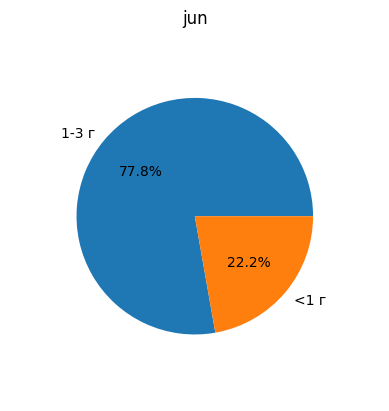

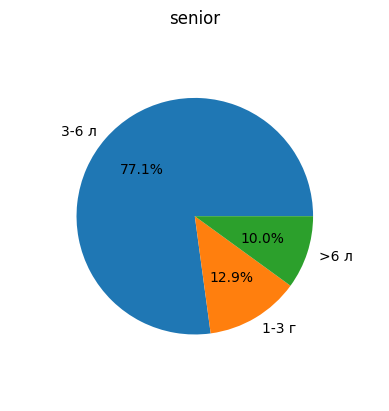

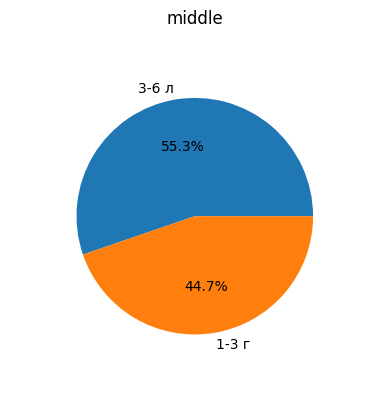

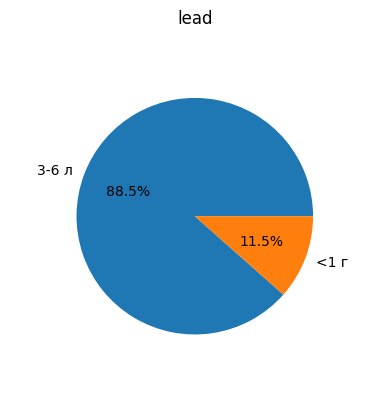

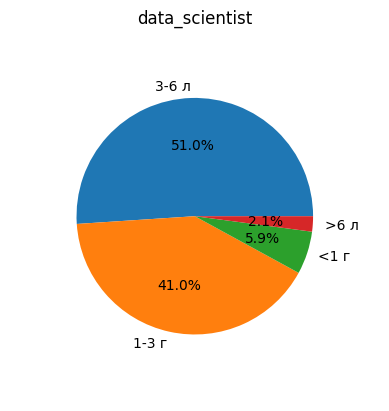

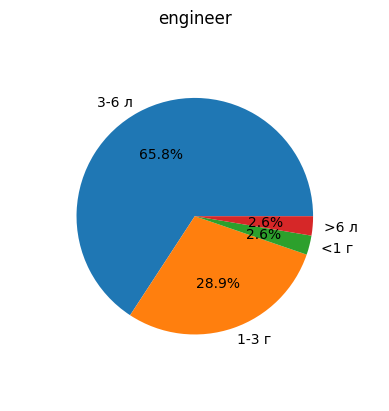

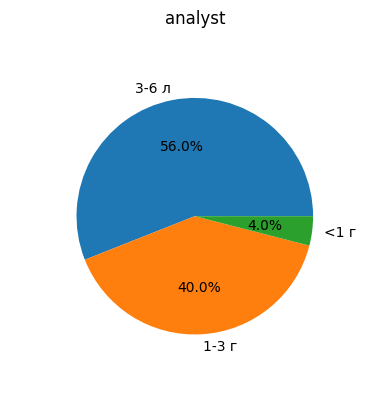

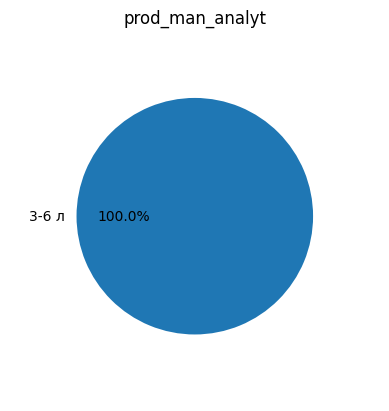

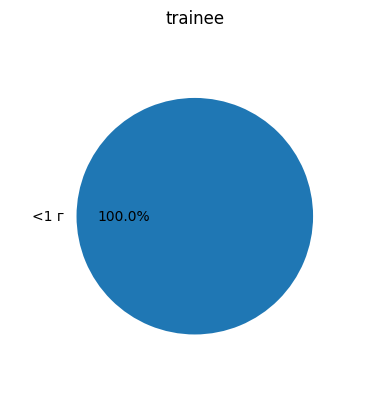

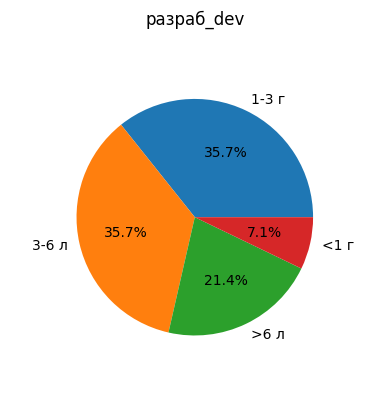

<Axes: >

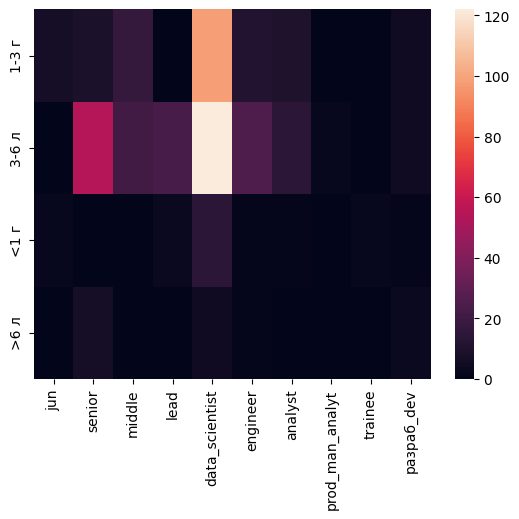

In [ ]:
expmodedict=dict()
expdistdict=dict()
for i in ['jun', 'senior', 'middle', 'lead', 'data_scientist', 'engineer', 'analyst', 'prod_man_analyt',
          'trainee', 'разраб_dev']:
          exp=full.query(i)['experience']
          expdistdict[i]=exp.value_counts()
          plt.pie(expdistdict[i], labels=expdistdict[i].keys(), autopct='%2.1f%%', radius=0.8)
          plt.title(i)
          # print(i, '\n', expdistdict[i], '\n')
          expmodedict[i]=exp.agg(pd.Series.mode)
          plt.show()
experince=pd.DataFrame(expdistdict).fillna(0)
sns.heatmap(experince)

In [ ]:
pd.DataFrame(expmodedict).T

,0,1
jun,1-3 г,NaN
senior,3-6 л,NaN
middle,3-6 л,NaN
lead,3-6 л,NaN
data_scientist,3-6 л,NaN
engineer,3-6 л,NaN
analyst,3-6 л,NaN
prod_man_analyt,3-6 л,NaN
trainee,<1 г,NaN
разраб_dev,1-3 г,3-6 л


### Результаты и обсуждение

Осуществлён парсинг данных с сайта hh.ru по запросу Data Scientist с ограничением зоны поиска вакансиями опубликованными для г. Москва. В результате парсинга выяснено что количество вакансий с указанием предлагаемого оклада, не превышает 7-8% записей датасета. При общем количестве записей порядка 300 вакансий, данные не позволяют надёжно оценить предлагаемую компенсацию, однако некоторые закономерности могут быть обнаружены:

1) Зарплатные предложения стажёрам и младшим специалистам как правило не публикуются

2) Вполне ожидаемый тренд роста зарплаты в ряду middle-senior-lead.

3) Достаточно часто в вакансии указывается позицияData Scientist без указания уровня позиции.

4) В поисковый запрос попадают дата инженеры, аналитики и менеджеры продукта, у них отмечены более низкие уровни компенсации.

5) Самый низкий оклад по позиции Data Scientist составляет 80 т. р., самый высокий 450 т. р. . Самый высокий оклад наблюдается для позиции senior data scientist со специализациев в nlp.

По стажам необходимым для замещения должностей, самым распростанённым является стаж 3-6 лет, причём это касается большинства позиций senior и lead. Исключением являются позиции разработчика имеющая две моды(1-3 г и 3-6 лет) и стажёра (менее года).

Крупные компании предпочитают не указывать зарплатные предложения.

Специалисты с опытом более 6 лет чаще всего требуются в области разработки.

Практически каждая 4 вакантная позиция открыта структурными подразделениями или дочерними компаниями Сбер-а. Самая популяоная локация- ЗАО (р-н Дорогомилово).


### Дальнейшие планы по исследованию

Данное исследование ограничивалось изучением данных получаемых по запросу вакансий со специальностью Data Scientist в г. Москва. Дальнейшие планы предполагают как расширение профессиональной области, так и региона поиска.
В случае получения достаточного объёма данных могут быть построены регрессионные модели, позволяющие предсказать зарплатные ожидания в зависимости от квалификации, стажа, а также навыков которыми обладает претендент на вакантную должность.